In [1]:

# call __init_ to set notebook seed
import set_notebook_env
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

import set_notebook_env
loader, plot_utils = set_notebook_env.set_env(data_dir="../data/", min_ratings=0, max_ratings=None)
    

In [2]:
loader.load_raw()
loader.merge()
df = loader.merged_df

In [3]:
# Calculate and display the proportion of missing values per column
# show only columns with missing values
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False) / df.shape[0]



would_take_again_prop    0.864727
avg_rating               0.221254
avg_difficulty           0.221254
num_ratings              0.221254
pepper                   0.221254
num_online_ratings       0.221254
major                    0.221254
university               0.221254
state                    0.221254
dtype: float64

In [4]:
# Check for logical inconsistencies in gender columns
(df["male"] & df["female"]).sum()


np.int64(2213)

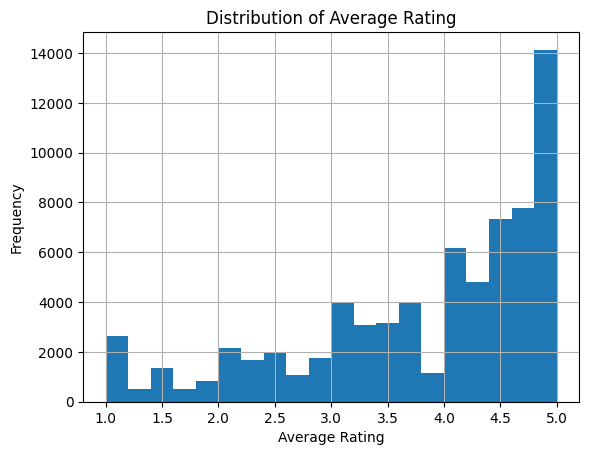

In [5]:
df["avg_rating"].hist(bins=20)
plt.title("Distribution of Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

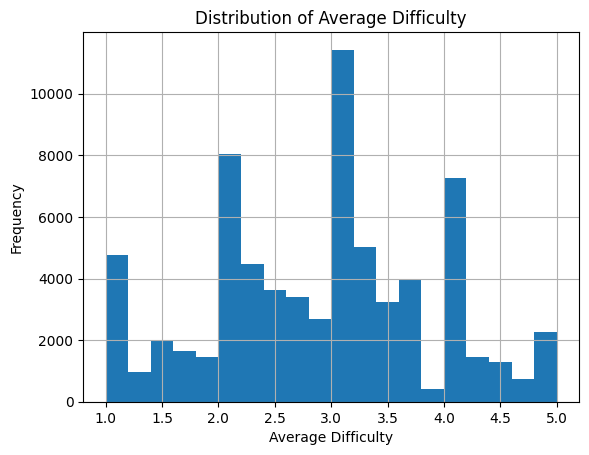

In [6]:
df["avg_difficulty"].hist(bins=20)
plt.title("Distribution of Average Difficulty")
plt.xlabel("Average Difficulty")
plt.ylabel("Frequency")
plt.show()

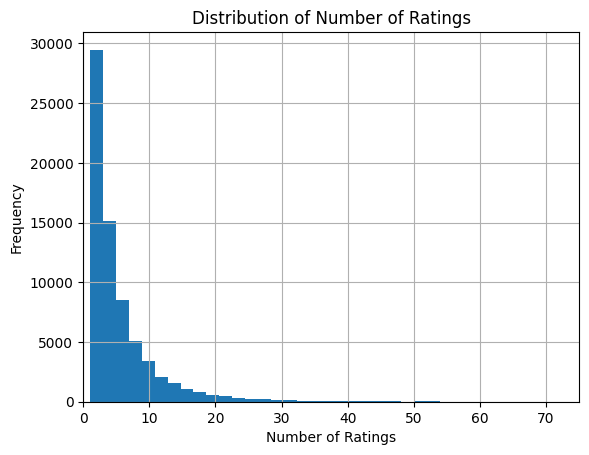

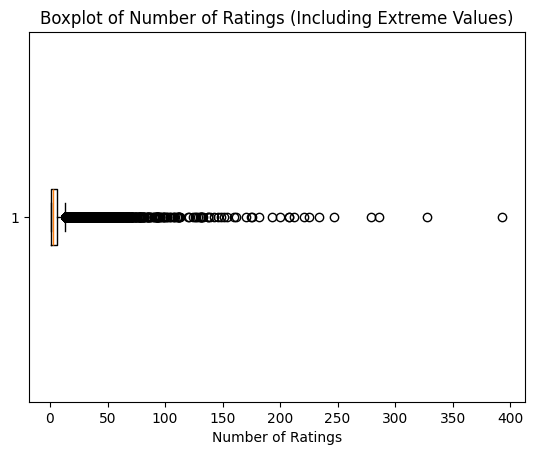

In [7]:
df["num_ratings"].hist(bins=200)
plt.title("Distribution of Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.xlim(0, 75)


plt.figure()
plt.boxplot(df["num_ratings"].dropna(), vert=False)
plt.title("Boxplot of Number of Ratings (Including Extreme Values)")
plt.xlabel("Number of Ratings")
plt.show()


In [8]:
loader.clean()
clean_df = loader.cleaned_df
loader.cleaning_info

# % dropped rows
(len(df) - len(clean_df)) / len(df) * 100, loader.cleaning_info


(24.587282516797934,
 {'dropped_low_rating_count': 19889,
  'dropped_missing_ratings': 0,
  'dropped_inconsistent_gender': 2213})

/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/assessing-professor-effectiveness/ape-capstone/utils/data_loader.py:214: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rel_tags = raw_tags.div(row_sums, axis=0).fillna(0.0)
/var/folders/9t/kz_xx0px1mxf1wqtzvvb57fc0000gn/T/ipykernel_20746/612931267.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl1.show()
/var/folders/9t/kz_xx0px1mxf1wqtzvvb57fc0000gn/T/ipykernel_20746/612931267.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl2.show()


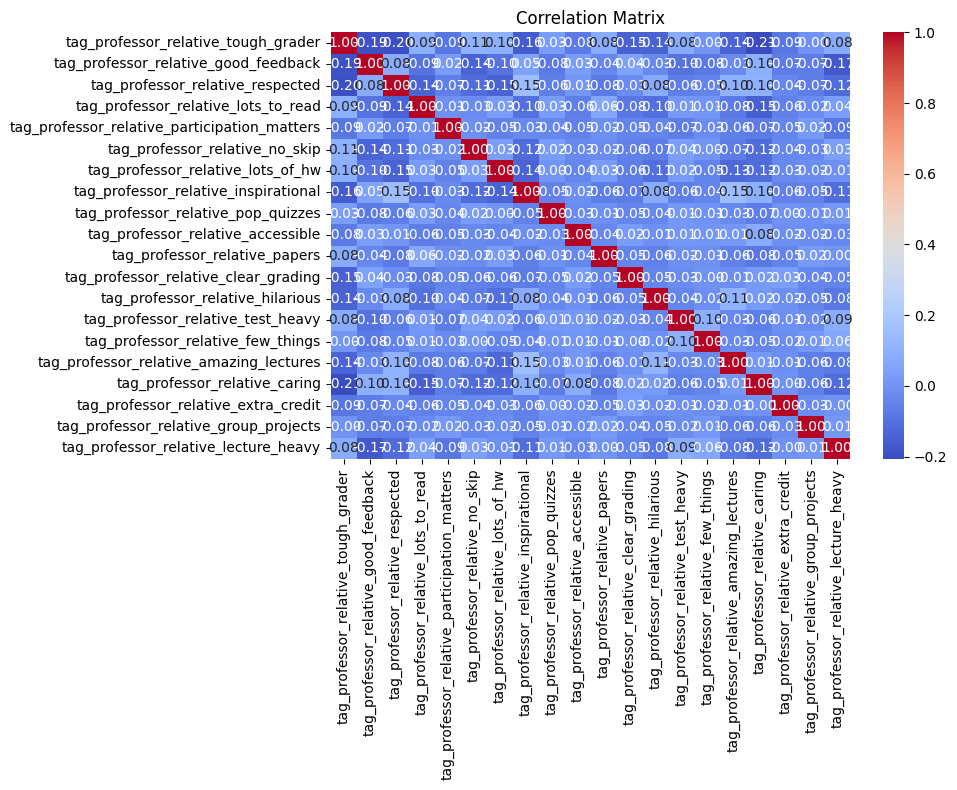

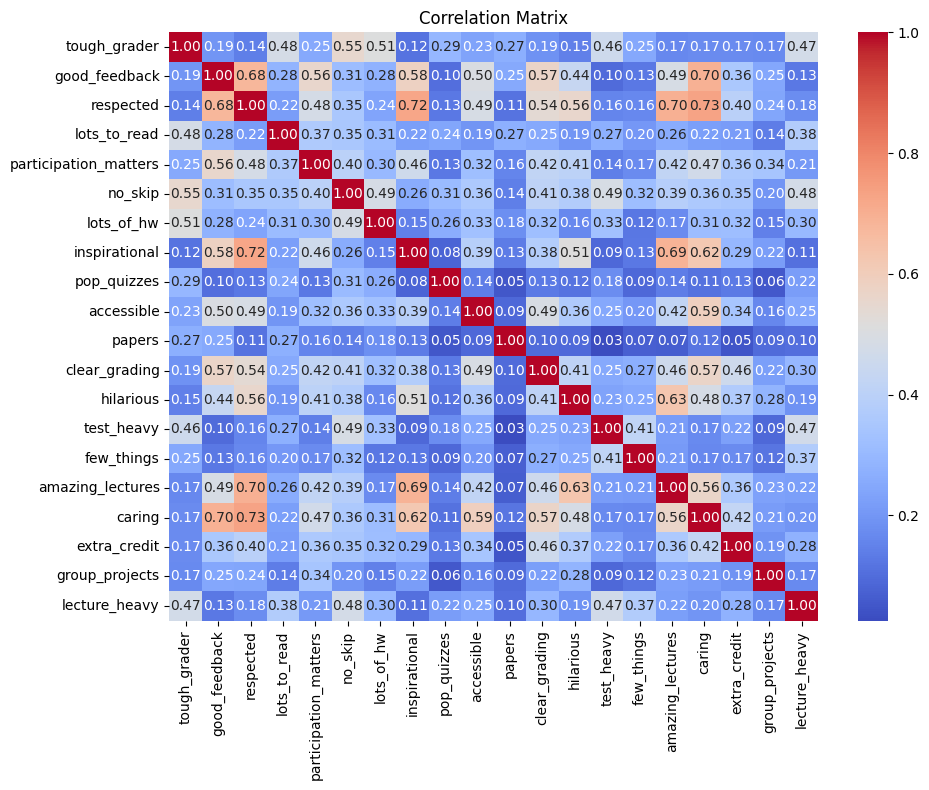

In [9]:
# this adds a column with normalized tag rates
# tag_rate_<tag> = tag_count / num_ratings

loader.add_professor_relative_tag_rates()


# view the correlation of tag rates 
tag_rate_cols = [col for col in loader.prepared_df.columns if col.startswith("tag_professor_relative_")]
pl1, corr_matrix1 = plot_utils.plot_correlation_matrix(loader.prepared_df[tag_rate_cols])

# view tag before rates
tag_cols = loader.tag_cols
pl2, corr_matrix2 = plot_utils.plot_correlation_matrix(loader.prepared_df[tag_cols])
pl1.show()
pl2.show()

In [10]:
res = loader.prepared_df[tag_rate_cols].describe()

# verify range of tag rates
for col in tag_rate_cols:
    print(f"{col}: min={res[col]['min']}, max={res[col]['max']}")

tag_professor_relative_tough_grader: min=0.0, max=1.0
tag_professor_relative_good_feedback: min=0.0, max=1.0
tag_professor_relative_respected: min=0.0, max=1.0
tag_professor_relative_lots_to_read: min=0.0, max=1.0
tag_professor_relative_participation_matters: min=0.0, max=1.0
tag_professor_relative_no_skip: min=0.0, max=1.0
tag_professor_relative_lots_of_hw: min=0.0, max=1.0
tag_professor_relative_inspirational: min=0.0, max=1.0
tag_professor_relative_pop_quizzes: min=0.0, max=1.0
tag_professor_relative_accessible: min=0.0, max=1.0
tag_professor_relative_papers: min=0.0, max=1.0
tag_professor_relative_clear_grading: min=0.0, max=1.0
tag_professor_relative_hilarious: min=0.0, max=1.0
tag_professor_relative_test_heavy: min=0.0, max=1.0
tag_professor_relative_few_things: min=0.0, max=1.0
tag_professor_relative_amazing_lectures: min=0.0, max=1.0
tag_professor_relative_caring: min=0.0, max=1.0
tag_professor_relative_extra_credit: min=0.0, max=1.0
tag_professor_relative_group_projects: min=0

In [11]:
loader.prepared_df[tag_cols].describe()

for col in tag_cols:
    print(f"{col}: min={loader.prepared_df[col].min()}, max={loader.prepared_df[col].max()}")

tough_grader: min=0, max=112
good_feedback: min=0, max=171
respected: min=0, max=186
lots_to_read: min=0, max=82
participation_matters: min=0, max=82
no_skip: min=0, max=110
lots_of_hw: min=0, max=141
inspirational: min=0, max=119
pop_quizzes: min=0, max=97
accessible: min=0, max=63
papers: min=0, max=64
clear_grading: min=0, max=77
hilarious: min=0, max=224
test_heavy: min=0, max=81
few_things: min=0, max=39
amazing_lectures: min=0, max=136
caring: min=0, max=127
extra_credit: min=0, max=128
group_projects: min=0, max=92
lecture_heavy: min=0, max=38


In [12]:
# show columns that highly correlate with each other in tag rates
highly_correlated_threshold = 0.5
highly_correlated_res_1 = defaultdict(list)

for col in corr_matrix1.columns:
    high_corrs = corr_matrix1[col][(corr_matrix1[col].abs() > highly_correlated_threshold) & (corr_matrix1[col].abs() < 1.0)]
    for other_col, corr_value in high_corrs.items():
        highly_correlated_res_1[col].append((other_col, corr_value))
        
print(highly_correlated_res_1)
len(highly_correlated_res_1)

defaultdict(<class 'list'>, {})


0

In [13]:
# show columns that highly correlate with each other in tag rates
highly_correlated_threshold = 0.5
highly_correlated_res_2 = defaultdict(list)

for col in corr_matrix2.columns:
    high_corrs = corr_matrix2[col][(corr_matrix2[col].abs() > highly_correlated_threshold) & (corr_matrix2[col].abs() < 1.0)]
    for other_col, corr_value in high_corrs.items():
        highly_correlated_res_2[col].append((other_col, corr_value))
        
print(highly_correlated_res_2)
len(highly_correlated_res_2)

defaultdict(<class 'list'>, {'tough_grader': [('no_skip', 0.5536375299347145), ('lots_of_hw', 0.5108529192174589)], 'good_feedback': [('respected', 0.6777944379881019), ('participation_matters', 0.5581603956162007), ('inspirational', 0.581605370539744), ('clear_grading', 0.5687788135381686), ('caring', 0.6952000812014231)], 'respected': [('good_feedback', 0.6777944379881019), ('inspirational', 0.7226394643808476), ('clear_grading', 0.5380241628787117), ('hilarious', 0.558006667166881), ('amazing_lectures', 0.6967576053046477), ('caring', 0.7325576581996481)], 'participation_matters': [('good_feedback', 0.5581603956162007)], 'no_skip': [('tough_grader', 0.5536375299347145)], 'lots_of_hw': [('tough_grader', 0.5108529192174589)], 'inspirational': [('good_feedback', 0.581605370539744), ('respected', 0.7226394643808476), ('hilarious', 0.513994743433248), ('amazing_lectures', 0.6880405472573956), ('caring', 0.6230261855529521)], 'accessible': [('caring', 0.5894566387824596)], 'clear_grading'

12